<a href="https://colab.research.google.com/github/Shubham-Govardhane/Shubham-Govardhane/blob/main/Mini_Project_3_Stroke_Data_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
pd.set_option('chained_assignment',None)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mini Project 3/healthcare-dataset-stroke-data.csv")

In [5]:
df.shape

(5110, 12)

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Setting id as index

In [7]:
df.set_index('id',inplace=True)

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Missing value Analysis

In [9]:
df.isna().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

## Filling missing values of bmi with linear regression

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
miss_df = df[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']]

In [12]:
miss_df_train = miss_df[miss_df['bmi'].notna()]
miss_df_test = miss_df[miss_df['bmi'].isna()]

In [13]:
miss_df_train.shape

(4909, 6)

In [14]:
miss_df_test.shape

(201, 6)

In [15]:
X_train = miss_df_train.drop(columns=['bmi'])
Y_train = miss_df_train['bmi']
X_test = miss_df_test.drop(columns=['bmi'])
Y_test = miss_df_test['bmi']

In [16]:
Y_test

id
51676   NaN
27419   NaN
8213    NaN
25226   NaN
61843   NaN
         ..
42007   NaN
28788   NaN
32235   NaN
7293    NaN
18234   NaN
Name: bmi, Length: 201, dtype: float64

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [18]:
pred = dt.predict(X_test)
pred = pd.DataFrame(pred,index=X_test.index,columns = ['impute_bmi_values'])
pred

,impute_bmi_values
id,
51676,35.8
27419,30.0
8213,28.2
25226,31.0
61843,28.8
...,...
42007,25.8
28788,27.9
32235,43.8


In [19]:
df = pd.concat([df,pred],axis=1)

In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,impute_bmi_values
id,,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0,43.0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,NaN
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,NaN
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,NaN
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,NaN
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,NaN
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,NaN


In [21]:
df['bmi'] = np.where(df['bmi'].notna(),df['bmi'],df['impute_bmi_values'])

In [22]:
del df['impute_bmi_values']

In [23]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,43.0,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


## Outlier Analysis

In [25]:
num_cols = ['age','avg_glucose_level','bmi']

In [26]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
df['Anomaly_Score'] = model_ee.fit_predict(df[num_cols])

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Anomaly_Score
id,,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,43.0,formerly smoked,0,1
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,1
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,1
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,1
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,1
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,1
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,1


In [28]:
df = df[df['Anomaly_Score']==1]

In [29]:
del df['Anomaly_Score']

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,43.0,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


## Identification of Cluster columns

In [31]:
clust_cols = ['age','avg_glucose_level','bmi']
clust_df = df[clust_cols]
clust_df.head()

,age,avg_glucose_level,bmi
id,,,
67,17.0,92.97,43.0
77,13.0,85.81,18.6
84,55.0,89.17,31.5
91,42.0,98.53,18.5
99,31.0,108.89,52.3


## Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clust_df_std = sc.fit_transform(clust_df)
clust_df_std = pd.DataFrame(clust_df_std,columns=clust_df.columns,index=clust_df.index)
clust_df_std

,age,avg_glucose_level,bmi
id,,,
67,-1.120732,-0.187663,1.926738
77,-1.298315,-0.386286,-1.336057
84,0.566306,-0.293077,0.388946
91,-0.010838,-0.033424,-1.349429
99,-0.499191,0.253969,3.170345
...,...,...,...
72911,0.655098,0.826815,4.320346
72914,-1.031940,-0.254240,-0.587219
72915,0.122349,2.013840,2.234297


## Kmeans Clustering

## Identification of Optimum value of K

In [33]:
from sklearn.metrics import silhouette_score
WCSS = []
sil_score = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(clust_df_std)
    WCSS.append(kmeans.inertia_)
    if pd.Series(kmeans.labels_).nunique() <2:
        sil_score.append(-1)
    else:
        sil_score.append(silhouette_score(clust_df[clust_cols],kmeans.labels_))


In [34]:
# converting the results into a dataframe and plotting them
df_scores = pd.DataFrame({'K':range(1,20), 'WCSS':WCSS,'silhouette_score':sil_score})
df_scores.sort_values(by='silhouette_score',ascending=False)

,K,WCSS,silhouette_score
2,3,6851.796770,0.331507
3,4,5133.844425,0.222577
5,6,3978.806900,0.218618
4,5,4387.697772,0.213099
1,2,9915.647418,0.207457
6,7,3593.462758,0.165912
8,9,3052.767388,0.163630
9,10,2848.698940,0.156945
7,8,3328.080547,0.138580
10,11,2663.012609,0.125921


## Elbow Plot

Text(0, 0.5, 'WCSS')

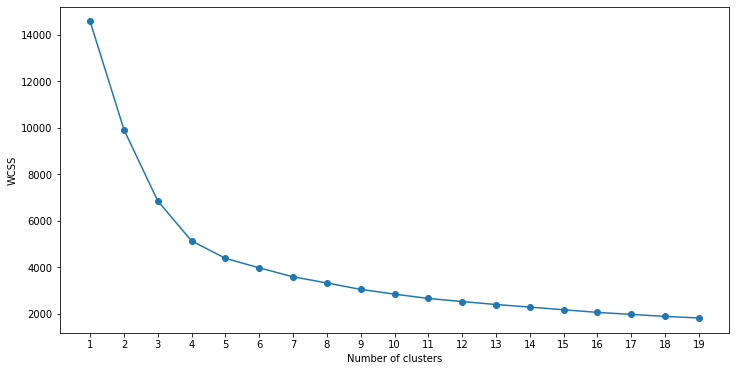

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df_scores['K'], df_scores['WCSS'], marker='o')
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhouette score')

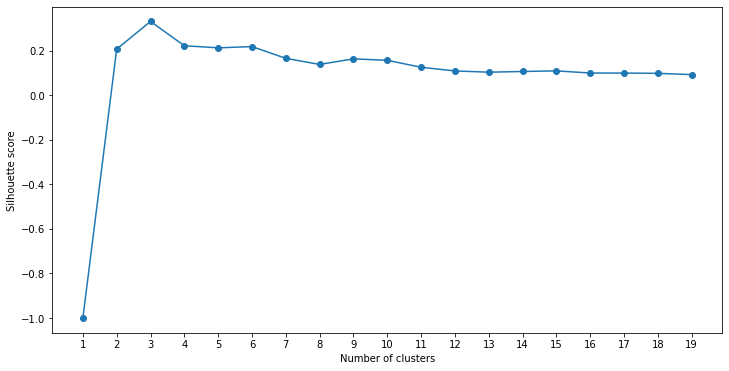

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df_scores['K'], df_scores['silhouette_score'], marker='o')
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## Prediction

In [37]:
kmeans = KMeans(n_clusters = df_scores[df_scores['silhouette_score']==df_scores['silhouette_score'].max()]['K'].values[0], 
                init='k-means++',random_state=42)
kmeans.fit(clust_df_std)
pred_kmeans = kmeans.predict(clust_df_std)
pred_kmeans

array([2, 1, 2, ..., 0, 2, 1], dtype=int32)

In [38]:
clust_df['Kmeans_pred'] = pred_kmeans
df['Kmeans_pred'] = pred_kmeans

In [39]:
clust_df

,age,avg_glucose_level,bmi,Kmeans_pred
id,,,,
67,17.0,92.97,43.0,2
77,13.0,85.81,18.6,1
84,55.0,89.17,31.5,2
91,42.0,98.53,18.5,1
99,31.0,108.89,52.3,2
...,...,...,...,...
72911,57.0,129.54,60.9,2
72914,19.0,90.57,24.2,1
72915,45.0,172.33,45.3,0


In [40]:
metric_df = pd.DataFrame(columns=['Method','Parameter','Silhoutte Score'])
metric_df.loc[len(metric_df)] = ('Kmeans',{"K":df_scores[df_scores['silhouette_score']==df_scores['silhouette_score'].max()]['K'].values[0]}
                                 ,df_scores['silhouette_score'].max())
metric_df

,Method,Parameter,Silhoutte Score
0,Kmeans,{'K': 3},0.331507


## DBSCAN

## Identifying Optimum parameter values

In [41]:
eps = []
min_samp = []
silhouette_sc = []
for e in [x/10 for x in range(1,10)]:
    for ms in range(2,30):
        print(e,ms)
        db = DBSCAN(eps=e,min_samples=ms,n_jobs=-1)
        db.fit(clust_df_std)
        eps.append(e)
        min_samp.append(ms)
        if pd.Series(db.labels_).nunique() <2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(silhouette_score(clust_df[clust_cols],db.labels_))

0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.1 10
0.1 11
0.1 12
0.1 13
0.1 14
0.1 15
0.1 16
0.1 17
0.1 18
0.1 19
0.1 20
0.1 21
0.1 22
0.1 23
0.1 24
0.1 25
0.1 26
0.1 27
0.1 28
0.1 29
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.2 10
0.2 11
0.2 12
0.2 13
0.2 14
0.2 15
0.2 16
0.2 17
0.2 18
0.2 19
0.2 20
0.2 21
0.2 22
0.2 23
0.2 24
0.2 25
0.2 26
0.2 27
0.2 28
0.2 29
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9
0.3 10
0.3 11
0.3 12
0.3 13
0.3 14
0.3 15
0.3 16
0.3 17
0.3 18
0.3 19
0.3 20
0.3 21
0.3 22
0.3 23
0.3 24
0.3 25
0.3 26
0.3 27
0.3 28
0.3 29
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 20
0.4 21
0.4 22
0.4 23
0.4 24
0.4 25
0.4 26
0.4 27
0.4 28
0.4 29
0.5 2
0.5 3
0.5 4
0.5 5
0.5 6
0.5 7
0.5 8
0.5 9
0.5 10
0.5 11
0.5 12
0.5 13
0.5 14
0.5 15
0.5 16
0.5 17
0.5 18
0.5 19
0.5 20
0.5 21
0.5 22
0.5 23
0.5 24
0.5 25
0.5 26
0.5 27
0.5 28
0.5 29
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 1

In [42]:
df_scores = pd.DataFrame(list(zip(eps,min_samp,silhouette_sc)),
                         columns=['eps','min_samples','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,eps,min_samples,score
137,0.5,27,0.439048
136,0.5,26,0.437747
135,0.5,25,0.436910
138,0.5,28,0.436550
139,0.5,29,0.434316
...,...,...,...
15,0.1,17,-1.000000
16,0.1,18,-1.000000
17,0.1,19,-1.000000
18,0.1,20,-1.000000


In [43]:
db = DBSCAN(eps=df_scores[df_scores['score']==df_scores['score'].max()]['eps'].values[0],
            min_samples=df_scores[df_scores['score']==df_scores['score'].max()]['min_samples'].values[0],
            n_jobs=-1)
db.fit(clust_df_std)
dbs_pred = db.labels_
dbs_pred

array([ 0,  0,  0, ..., -1,  0,  0])

In [44]:
clust_df['DBS_Pred'] = dbs_pred
df['DBS_Pred'] = dbs_pred

In [45]:
metric_df.loc[len(metric_df)] = ('DBSCAN',{"eps":df_scores[df_scores['score']==df_scores['score'].max()]['eps'].values[0],
                                           "min_samples":df_scores[df_scores['score']==df_scores['score'].max()]['min_samples'].values[0]}
                                 ,df_scores['score'].max())
metric_df

,Method,Parameter,Silhoutte Score
0,Kmeans,{'K': 3},0.331507
1,DBSCAN,"{'eps': 0.5, 'min_samples': 27}",0.439048


## Agglomarative Clustering

## Identifying Optimum parameter values

In [46]:
from sklearn.cluster import AgglomerativeClustering
n_clust = []
linkage = []
silhouette_sc = []
for i in range(2,11):
    for l in ['ward', 'complete', 'average', 'single']:
        print(i,l)
        agm = AgglomerativeClustering(n_clusters=i,linkage=l, 
                             compute_full_tree=True)
        agm.fit(clust_df_std)
        n_clust.append(i)
        linkage.append(l)
        if pd.Series(agm.labels_).nunique() <2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(silhouette_score(clust_df[clust_cols],agm.labels_))

2 ward
2 complete
2 average
2 single
3 ward
3 complete
3 average
3 single
4 ward
4 complete
4 average
4 single
5 ward
5 complete
5 average
5 single
6 ward
6 complete
6 average
6 single
7 ward
7 complete
7 average
7 single
8 ward
8 complete
8 average
8 single
9 ward
9 complete
9 average
9 single
10 ward
10 complete
10 average
10 single


In [47]:
df_scores = pd.DataFrame(list(zip(n_clust,linkage,silhouette_sc)),
                         columns=['K','linkage','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,K,linkage,score
3,2,single,0.371474
4,3,ward,0.337400
9,4,complete,0.204353
0,2,ward,0.201182
8,4,ward,0.190261
12,5,ward,0.136987
6,3,average,0.132704
24,8,ward,0.118582
13,5,complete,0.107944
10,4,average,0.106858


In [48]:
agm = AgglomerativeClustering(n_clusters = df_scores[df_scores['score']==df_scores['score'].max()]['K'].values[0],
                              linkage=df_scores[df_scores['score']==df_scores['score'].max()]['linkage'].values[0])
agm_pred = agm.fit_predict(clust_df_std)

In [49]:
df['AGM_pred'] = agm_pred
clust_df['AGM_pred'] = agm_pred

In [50]:
metric_df.loc[len(metric_df)] = ('Agglomarative',{"K":df_scores[df_scores['score']==df_scores['score'].max()]['K'].values[0],
                                           "linkage":df_scores[df_scores['score']==df_scores['score'].max()]['linkage'].values[0]}
                                 ,df_scores['score'].max())
metric_df

,Method,Parameter,Silhoutte Score
0,Kmeans,{'K': 3},0.331507
1,DBSCAN,"{'eps': 0.5, 'min_samples': 27}",0.439048
2,Agglomarative,"{'K': 2, 'linkage': 'single'}",0.371474


In [51]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Kmeans_pred,DBS_Pred,AGM_pred
id,,,,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,43.0,formerly smoked,0,2,0,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,1,0,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,2,0,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,1,0,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,2,-1,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,1,0,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,0,-1,0


In [52]:
df['DBS_Pred']+=1

In [53]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Mini Project 3/df_with_clusters.csv")

In [54]:
import joblib
joblib.dump(db,"/content/drive/MyDrive/Colab Notebooks/Mini Project 3/dbscan.joblib")

['/content/drive/MyDrive/Colab Notebooks/Mini Project 3/dbscan.joblib']